In [35]:
import pandas as pd

df = pd.read_csv('pit_bb_war.csv', index_col='playerid')
df.insert(0, column='const', value=1)
df.head()

,const,Name,Team,W,L,SV,G,GS,IP,K/9,...,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR
playerid,,,,,,,,,,,,,,,,,,,,,
16149,1,Aaron Nola,PHI,11,13,0,32,32,205.0,10.32,...,0.289,73.0%,43.6%,9.8%,92.9,3.25,2.74,2.58,2.77,6.3
16137,1,Carlos Rodon,SFG,14,8,0,31,31,178.0,11.98,...,0.293,75.1%,34.1%,6.5%,95.5,2.88,2.64,2.25,2.91,6.2
8700,1,Justin Verlander,HOU,18,4,0,28,28,175.0,9.51,...,0.240,80.5%,37.9%,6.2%,95.1,1.75,2.66,2.49,3.23,6.1
18684,1,Sandy Alcantara,MIA,14,9,0,32,32,228.2,8.15,...,0.262,78.8%,53.4%,8.5%,98.0,2.28,2.92,2.99,3.29,5.7
14107,1,Kevin Gausman,TOR,12,10,0,31,31,174.2,10.56,...,0.363,74.0%,39.2%,8.5%,94.9,3.35,3.34,2.38,2.76,5.7


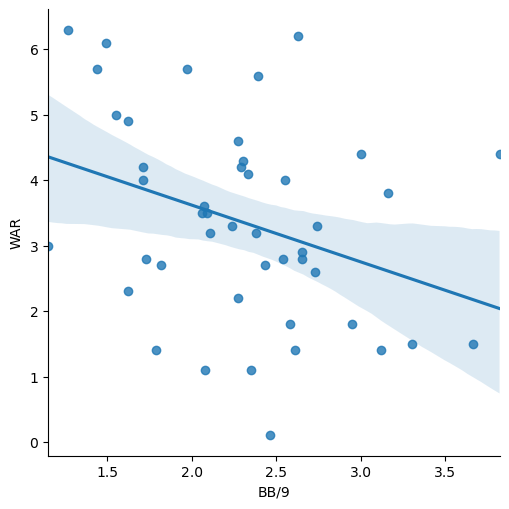

In [8]:
import seaborn as sns

sns.lmplot(data=df, x='BB/9', y='WAR')

In [36]:
import statsmodels.api as sm

model = sm.OLS(endog=df['WAR'], exog=df[['const', 'BB/9']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.626
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0222
Time:                        19:44:22   Log-Likelihood:                -79.566
No. Observations:                  45   AIC:                             163.1
Df Residuals:                      43   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3560      0.871      6.152      0.0

## Velo Analysis

In [28]:
import numpy as np

df_velo = pd.read_csv('pit_vel.csv', index_col='playerid')
df_velo['WAR'] = df.WAR
df_velo.insert(0, column='const', value=1)
df_velo.head()

,const,Name,Team,IP,vFA,vFC,vFS,vSI,vCH,vSL,vCU,vCS,vKN,vSB,WAR
playerid,,,,,,,,,,,,,,,
18684,1,Sandy Alcantara,MIA,228.2,98.0,NaN,NaN,97.8,91.7,89.9,84.1,NaN,NaN,NaN,5.7
13125,1,Gerrit Cole,NYY,200.2,97.8,92.3,NaN,NaN,89.7,88.7,82.9,NaN,NaN,NaN,3.3
19755,1,Shohei Ohtani,LAA,166.0,97.4,90.5,89.3,97.2,91.9,85.3,77.9,NaN,NaN,NaN,5.6
21483,1,Shane McClanahan,TBR,166.1,97.0,NaN,NaN,NaN,87.9,89.6,82.3,NaN,NaN,NaN,3.5
18525,1,Dylan Cease,CHW,184.0,96.9,NaN,78.0,NaN,NaN,87.5,81.3,NaN,NaN,NaN,4.4


In [30]:
# if the pitcher doesn't have the pitch, drop the pitcher
fastball = df_velo[['const', 'vFA', 'WAR']].dropna(axis=0)

fastball

,const,vFA,WAR
playerid,,,
18684,1,98.0,5.7
13125,1,97.8,3.3
19755,1,97.4,5.6
21483,1,97.0,3.5
18525,1,96.9,4.4
19361,1,96.2,4.6
22250,1,96.1,3.2
15038,1,95.7,1.4
16137,1,95.5,6.2


In [34]:
results_FA = sm.OLS(endog=fastball.WAR, exog=fastball[['const', 'vFA']]).fit()
print(results_FA.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6.690
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0132
Time:                        19:43:11   Log-Likelihood:                -79.079
No. Observations:                  45   AIC:                             162.2
Df Residuals:                      43   BIC:                             165.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7390      8.931     -2.210      0.0